<div style="text-align: center; font-size: 25pt"> Homework 4 </div>

# load packages

In [1]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import scipy.stats as stats
# you may add more if you need

# Data Relationships

<font color='red'>**Question:**</font>  Load the ``insurance.csv`` dataset.

In [20]:
# load the insurance data
insurance  = pd.read_csv("./files/insurance.csv")
print (insurance.shape)
insurance.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
t = insurance['sex'].value_counts()
t

male      676
female    662
Name: sex, dtype: int64

## Do younger people smoker less?

<font color='red'>**Question:**</font>  Create a new dummy variable called ``younger`` which split the observations into 2 groups based on age. 1 for people with age <=25; 0 for others.



In [4]:
insurance["is_valid"] = insurance['age']<= 25
insurance.loc[:,"younger"] = insurance.loc[:,"is_valid"].map({ True :1, False :0})
#del insurance["is_valid"]
insurance.head()

,age,sex,bmi,children,smoker,region,charges,is_valid,younger
0,19,female,27.900,0,yes,southwest,16884.92400,True,1
1,18,male,33.770,1,no,southeast,1725.55230,True,1
2,28,male,33.000,3,no,southeast,4449.46200,False,0
3,33,male,22.705,0,no,northwest,21984.47061,False,0
4,32,male,28.880,0,no,northwest,3866.85520,False,0


<font color='red'>**Question:**</font> For female and male person respectively, what's the percentage of smokers for younger and older persons?
i.e., make a datafram like this:

| sex | younger | %smoker |
|:---:|:-------:|:-------:|
|  F  | 1       |         |
|  F  | 0       |         |
|  M  | 1       |         |
|  M  | 0       |         |

In [7]:
Fsmoker = insurance[(insurance['smoker'] == 'yes') & (insurance['sex'] == 'female') & (insurance['younger'] == 1)]['sex'].count()
FNsmoker = insurance[(insurance['smoker'] == 'yes') & (insurance['sex'] == 'female')& (insurance['younger'] == 0)]['sex'].count()
Msmoker = insurance[(insurance['smoker'] == 'yes') & (insurance['sex'] == 'male')& (insurance['younger'] == 1)]['sex'].count()
MNsmoker = insurance[(insurance['smoker'] == 'yes') & (insurance['sex'] == 'male')& (insurance['younger'] == 0)]['sex'].count()
df_from_dict = pd.DataFrame({ 'sex' : ['F', 'F', 'M ','M'],
                      'younger' : [  1,   0,   1,  0],
                      '%smoker' : [  "%.2f%%" % (Fsmoker/1338 * 100),"%.2f%%" % (FNsmoker/1338 * 100),"%.2f%%" % (Msmoker/1338 * 100),"%.2f%%" % (MNsmoker/1338 * 100)]
                      })
df_from_dict.set_index('sex')

,younger,%smoker
sex,,
F,1,2.09%
F,0,6.50%
M,1,2.77%
M,0,9.12%


## For younger people, the health charges of smokers and non-smokers differ or not?

<font color='red'>**Question:**</font> Just for younger persons, make two boxplots in one plot to show the charges for smokers and non-smokers. 

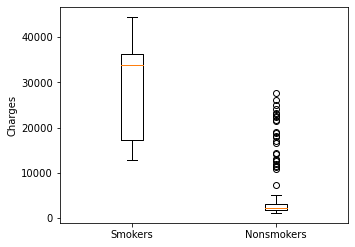

In [8]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) 
younger_condition = insurance[insurance["younger"] == 1]
masksmoker = (younger_condition['smoker'] == 'yes' )
axes.boxplot([younger_condition['charges'][masksmoker], younger_condition['charges'][~masksmoker]]);
axes.set_ylabel('Charges')
axes.set_xticklabels(['Smokers', 'Nonsmokers']);

## age v.s. charges for non-smokers

<font color='red'>**Question:**</font> For non-smokers, make a scatterplot to show the correlation between ``age`` and ``charges``, add a linear line to represent the relationship (hint: using ``stats.linregress``)

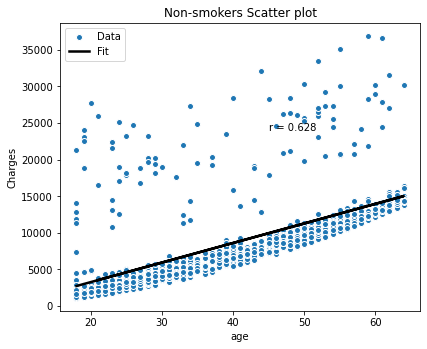

In [104]:
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

non_smokers  = insurance[insurance['smoker'] == 'no']
axes.scatter(non_smokers['age'], non_smokers['charges'], label='Data', edgecolors='w');

# Plot fit
slope, intercept, r_value, _, _ = stats.linregress(non_smokers['age'], non_smokers['charges'])
line = slope * non_smokers['age'] + intercept
axes.plot(non_smokers['age'], line, linewidth=2.5, color='k', label='Fit')

axes.text(45, 24000, "r = " + str(round(r_value, 3)))
axes.legend(loc='upper left'); axes.set_xlabel('age'); axes.set_ylabel('Charges'); axes.set_title('Non-smokers Scatter plot');


<font color='red'>**Question:**</font> For smokers, make a scatterplot to show the correlation between ``age`` and ``charges``, add a linear line to represent the relationship (hint: using ``stats.linregress``)

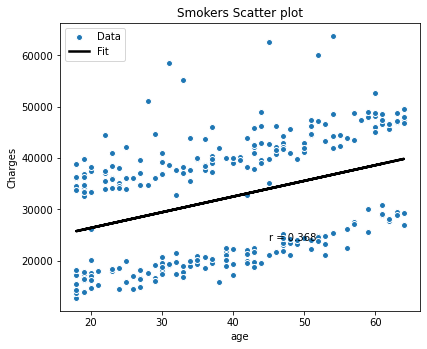

In [105]:
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

smoker_data = insurance[insurance['smoker'] == 'yes']
axes.scatter(smoker_data['age'], smoker_data['charges'], label='Data', edgecolors='w');

# Plot fit
slope, intercept, r_value, _, _ = stats.linregress(smoker_data['age'], smoker_data['charges'])
line = slope * smoker_data['age'] + intercept
axes.plot(smoker_data['age'], line, linewidth=2.5, color='k', label='Fit')

axes.text(45, 24000, "r = " + str(round(r_value, 3)))
axes.legend(loc='upper left'); axes.set_xlabel('age'); axes.set_ylabel('Charges'); axes.set_title('Smokers Scatter plot');


<font color='red'>**Question:**</font> Using different colors for smokers and non-smokers, make scatterplots to show the correlation between ``age`` and ``charges``, add linear lines to represent the relationship respectively.

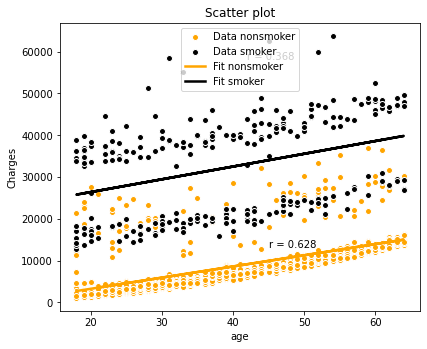

In [101]:
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

masksmoker = (insurance['smoker'] == 'yes' )

# Plot data
axes.scatter(insurance['age'][~masksmoker], insurance['charges'][~masksmoker], color='orange', label="Data nonsmoker", edgecolors='w');
axes.scatter(insurance['age'][masksmoker], insurance['charges'][masksmoker], color='k', label="Data smoker", edgecolors='w');

# Plot fits
slope, intercept, r_value, _, _ = stats.linregress(insurance['age'][~masksmoker], insurance['charges'][~masksmoker])
axes.plot(insurance['age'][~masksmoker], slope * insurance['age'][~masksmoker] + intercept, linewidth=2.5, color='orange', label='Fit nonsmoker')
axes.text(45, 13000, "r = " + str(round(r_value, 3)))
slope, intercept, r_value, _, _ = stats.linregress(insurance['age'][masksmoker], insurance['charges'][masksmoker])
axes.plot(insurance['age'][masksmoker], slope * insurance['age'][masksmoker] + intercept, linewidth=2.5, color='k', label='Fit smoker')
axes.text(42, 58000, "r = " + str(round(r_value, 3)))

axes.legend(); axes.set_xlabel('age'); axes.set_ylabel('Charges'); axes.set_title('Scatter plot');

<font color='red'>**Question:**</font> What you can conclude from the above analysis?

Younger people smoke less.
从统计数据看，在charges上，对于年轻人：吸烟的比不吸烟花费多；对于不吸烟的，年龄小的花费更少且较为集中；对于吸烟的人，charges的差异较大，总体来看年龄小的花费更少；相同年龄状况下，不吸烟的比吸烟的花费少。

# pandas groupby and merge

<font color='red'>**Question:**</font> Load the ``state_population.csv``, ``state_areas.csv`` and the ``state_abbrevs.csv`` in the following three cells.

In [10]:
# load the state_population here
state_population = pd.read_csv("./state_population.csv")
state_population.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [11]:
# load the state_areas here
state_areas = pd.read_csv("./state_areas.csv")
state_areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [12]:
# load the state_abbrevs here
state_abbrev = pd.read_csv("./state_abbrevs.csv")
state_abbrev.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


<font color='red'>**Question:**</font> Rank US ***states with full name*** by their 2010 population density. 

Note: 
1. Here the population density is the total population devided by area.
1. You need to take care of missing values when merging data. In case of missing values, just drop them.
1. The total population is the population with ``ages`` equals to ``total``.

In [13]:
df1 = state_population[(state_population['year'] == 2010) & (state_population['ages'] == 'total')]
df2 = pd.merge(state_areas, state_abbrev, on = 'state', how='inner')
df3 = pd.merge(df1, df2, left_on = 'state/region',right_on = 'abbreviation')
df3['population_density']= df3['population']/df3['area (sq. mi)']
df4 = df3.sort_values(by="population_density",ascending=False)
rank = pd.Series(df4['state'].values, index = range(1, len(df4['state'].values)+1))
rank

1     District of Columbia
2               New Jersey
3             Rhode Island
4              Connecticut
5            Massachusetts
6                 Maryland
7                 Delaware
8                 New York
9                  Florida
10            Pennsylvania
11                    Ohio
12              California
13                Illinois
14                Virginia
15                 Indiana
16          North Carolina
17                 Georgia
18               Tennessee
19          South Carolina
20           New Hampshire
21                  Hawaii
22                Kentucky
23                Michigan
24              Washington
25                   Texas
26                 Alabama
27               Louisiana
28               Wisconsin
29                Missouri
30           West Virginia
31                 Vermont
32             Mississippi
33               Minnesota
34                 Arizona
35                Arkansas
36                    Iowa
37                Oklahoma
3

<font color='red'>**Question:**</font> Question: For each age category, calculate the average and standard deviations of the yearly population density for each states.

In [124]:
d1 = state_population[state_population['ages'] == 'total']
d2 = pd.merge(state_areas, state_abbrev, on = 'state', how='inner')
d3 = pd.merge(d1, d2, left_on = 'state/region',right_on = 'abbreviation')
d3['population_density']= d3['population']/d3['area (sq. mi)']
for state in np.unique(d3['state']):
    d4 = d3.loc[d3["state"] == state, ["population_density"]]
    print(str(state))
    print("average: ",d4.mean().values)
    print("standard deviations: ",d4.std().values)
    print()

Alabama
average:  [85.54504464]
standard deviations:  [4.48672079]

Alaska
average:  [0.98443056]
standard deviations:  [0.07798328]

Arizona
average:  [46.4414139]
standard deviations:  [8.38520254]

Arkansas
average:  [50.64077445]
standard deviations:  [3.53527702]

California
average:  [209.72919454]
standard deviations:  [15.8180954]

Colorado
average:  [41.87697606]
standard deviations:  [5.71794442]

Connecticut
average:  [620.65345418]
standard deviations:  [19.63944588]

Delaware
average:  [410.93777721]
standard deviations:  [41.13591629]

District of Columbia
average:  [8633.37193627]
standard deviations:  [326.75070425]

Florida
average:  [250.86746353]
standard deviations:  [31.57396559]

Georgia
average:  [140.92096435]
standard deviations:  [18.82149957]

Hawaii
average:  [114.88692981]
standard deviations:  [7.60150267]

Idaho
average:  [15.99596166]
standard deviations:  [2.26196029]

Illinois
average:  [213.59156983]
standard deviations:  [7.52067665]

Indiana
average

# The end